# Data preprocessing

## Library Imports

In [83]:
import sklearn
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

## Data Imports

In [84]:
wineData = datasets.load_wine()

In [85]:
Data = pd.DataFrame(wineData.data,columns = wineData.feature_names)

In [86]:
Data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [87]:
Data["Class"] = wineData.target

In [88]:
Data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Exploratory Data Analysis

In [89]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Class

In [90]:
Data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [91]:
Data.Class.unique()

array([0, 1, 2])

<Axes: xlabel='Class', ylabel='alcohol'>

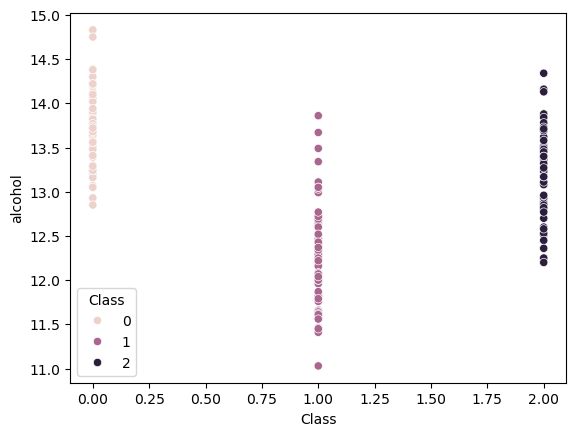

In [92]:
sns.scatterplot(x = Data.Class, y = Data.alcohol,hue = Data.Class)

<Axes: xlabel='Class', ylabel='count'>

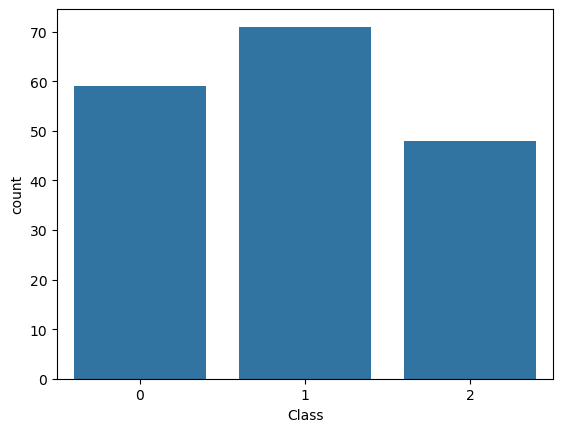

In [93]:
sns.countplot(x = Data.Class)

In [94]:
correlation_matrix = Data.corr()

<Axes: >

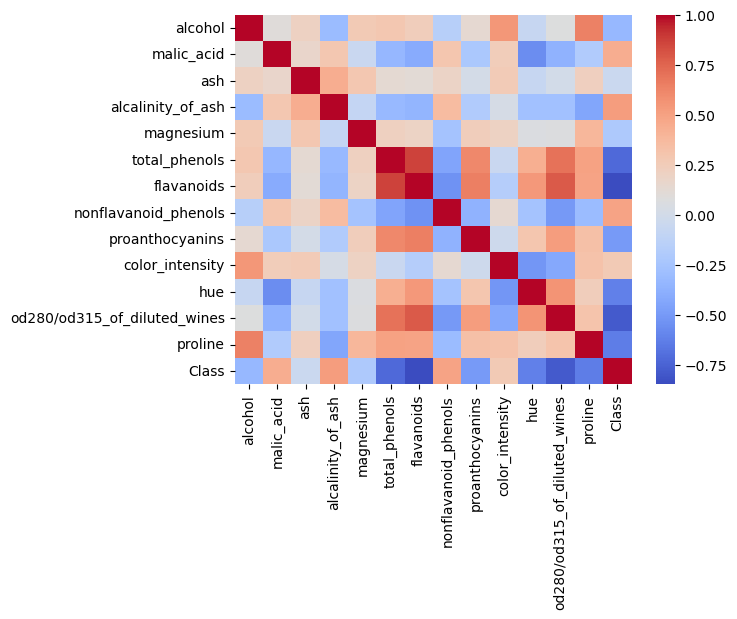

In [95]:
sns.heatmap(correlation_matrix,cmap = "coolwarm")

## Handling Missing Values

In [96]:
Data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Class                           0
dtype: int64

## Feature Engineering

In [97]:
X = Data.drop("Class",axis = 1)
y = Data.Class

## Handling Outliers

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'malic_acid'),
  Text(2, 0, 'ash'),
  Text(3, 0, 'alcalinity_of_ash'),
  Text(4, 0, 'magnesium'),
  Text(5, 0, 'total_phenols'),
  Text(6, 0, 'flavanoids'),
  Text(7, 0, 'nonflavanoid_phenols'),
  Text(8, 0, 'proanthocyanins'),
  Text(9, 0, 'color_intensity'),
  Text(10, 0, 'hue'),
  Text(11, 0, 'od280/od315_of_diluted_wines'),
  Text(12, 0, 'proline')])

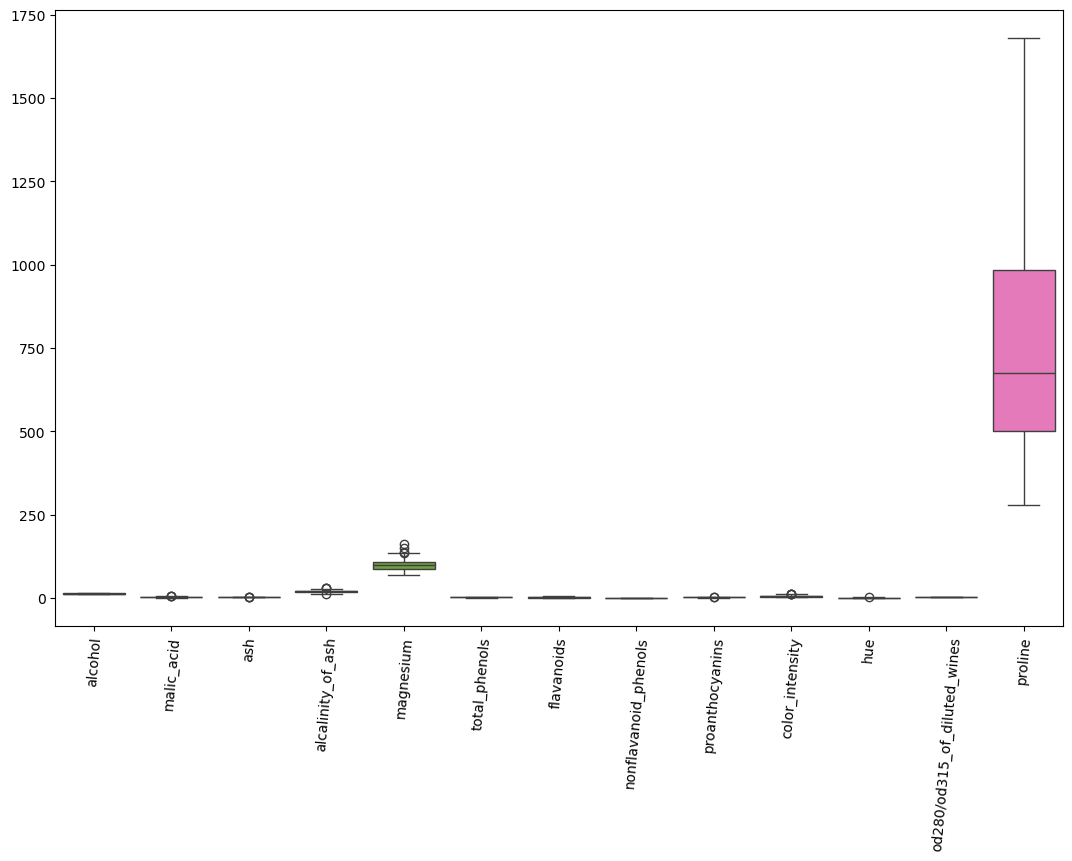

In [98]:
plt.figure(figsize=(13,8))
sns.boxplot(Data.drop("Class",axis = 1))
plt.xticks(rotation=85) 

## Data Visualization

<Axes: ylabel='proline'>

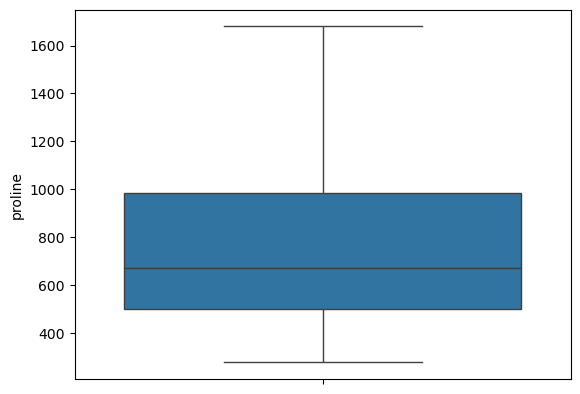

In [99]:
sns.boxplot(Data.proline)


# Model building

## Train Test Split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Initialization

In [101]:
model = LogisticRegression()

In [102]:
knn = KNeighborsClassifier(n_neighbors = 7)

## Model Training

In [103]:
model.fit(X_train,y_train)

C:\Users\bavit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

## Hyper Parameter Tunning

# Evaluation and Result

In [105]:
y_pred_LR = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9814814814814815

In [106]:
y_pred_KNN = knn.predict(X_test)
accuracy_score(y_test,y_pred_KNN)

0.7592592592592593

In [107]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_LR)
conf_matrix_lr

array([[18,  1,  0],
       [ 0, 21,  0],
       [ 0,  0, 14]], dtype=int64)

In [108]:
conf_matrix_Knn = confusion_matrix(y_test, y_pred_KNN)
conf_matrix_Knn

array([[18,  0,  1],
       [ 1, 14,  6],
       [ 1,  4,  9]], dtype=int64)

# Errors

## Research